In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.visualization import plot_3Dscatter_pca, plot_scatter_pca, plot_cumulative_explained_variance, biplot_PCA

In [4]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

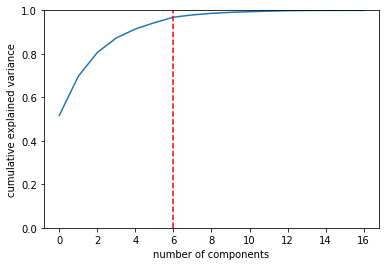

In [5]:
plot_cumulative_explained_variance(pca.explained_variance_ratio_)

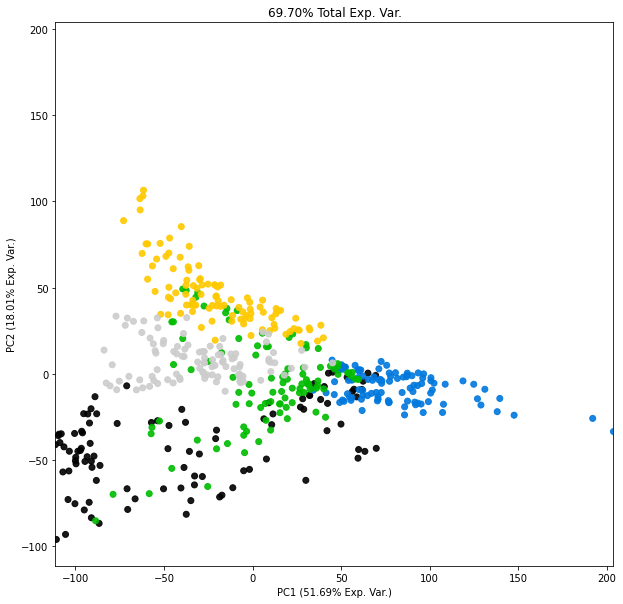

In [6]:
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patients_ids)

In [7]:
print(pca.components_[0:2, :].T.shape)
print(np.sqrt(pca.explained_variance_[0:2]).shape)

(17, 2)
(2,)


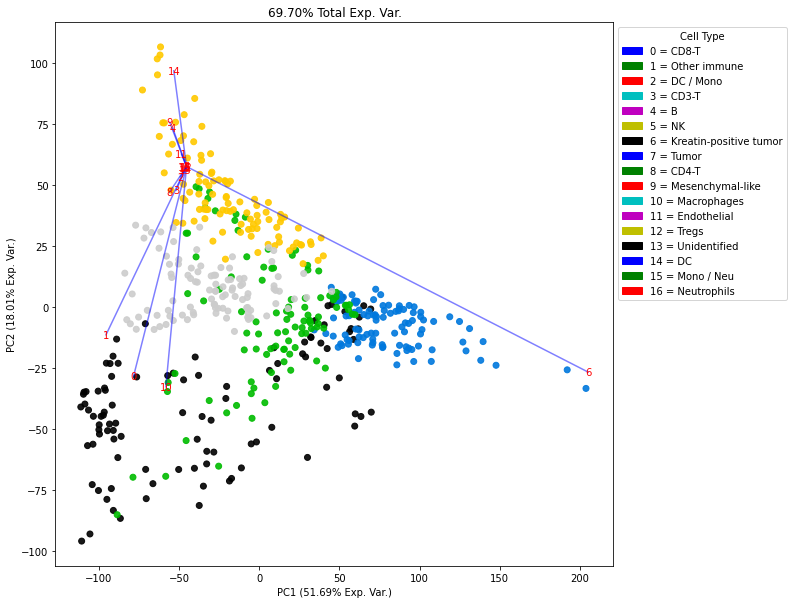

In [7]:
#Original Axis generator
original_axis = np.zeros((18, 17))
np.fill_diagonal(original_axis, np.array(sites).max(0))
original_axis_pc = pca.transform(original_axis)
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patients_ids, original_axis=original_axis_pc, cell_type=CELL_TYPES)

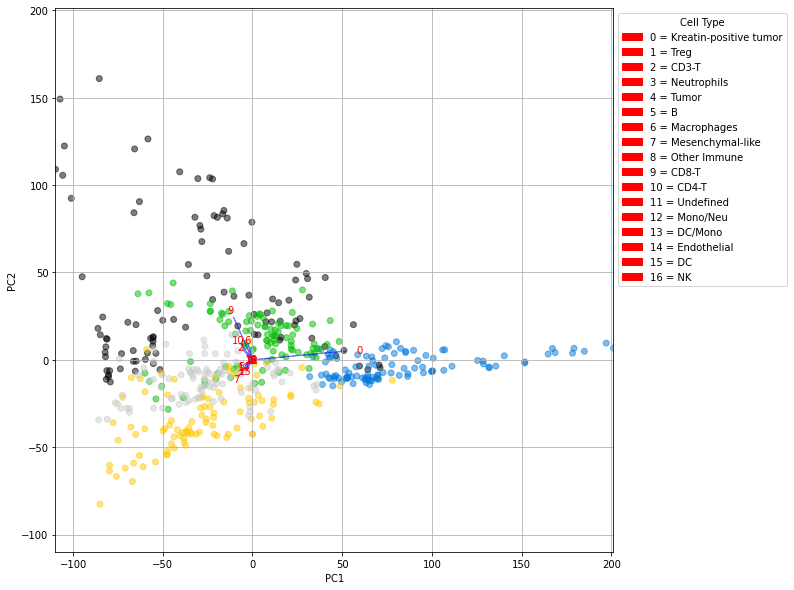

In [9]:
loadings = np.transpose(pca.components_[0:2, :])* np.sqrt(pca.explained_variance_[0:2])
biplot_PCA(pc[:,0:2], loadings, patients_ids, CELL_TYPES)

In [10]:
pca.components_

array([[ 9.45502038e-01,  5.55111512e-17, -1.05418216e-01,
        -2.00883007e-02, -2.42404407e-03, -9.59240974e-02,
        -4.66613040e-02, -1.45433740e-01, -8.07793567e-28,
        -1.92705208e-01, -1.23191476e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -7.50025880e-02,
        -6.26221822e-02, -1.07440299e-02],
       [ 1.57741039e-01, -0.00000000e+00,  1.98025837e-01,
        -6.85928232e-03,  8.45670707e-03, -9.32555269e-02,
         3.05692048e-01, -3.06229424e-01, -0.00000000e+00,
         7.76838342e-01,  3.02720129e-01, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -1.07336760e-01,
        -1.82167305e-01,  6.39460737e-03],
       [-1.18013734e-01,  0.00000000e+00,  1.88790500e-02,
         8.95927418e-02,  6.91992248e-03, -2.88759099e-01,
         8.16727543e-01, -7.73661561e-02,  0.00000000e+00,
        -3.24860275e-01, -2.59492603e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.01281304e-01,
        -1.93956964e-01, -2.1

0.81% Total Exp. Var.


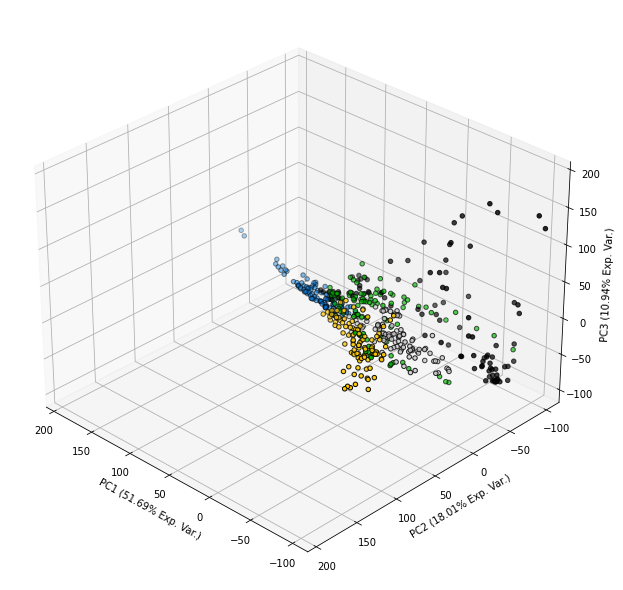

In [8]:
plot_3Dscatter_pca(pc, pca.explained_variance_ratio_, patients_ids)

In [9]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
#full_patient_ids = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 19, 20, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41]

N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, RADIUS, method='abs', snr=3)
sites, patient_ids = join_abundance_matrices(abs_log_ca_list)
pca = PCA()
pc = pca.fit_transform(sites)

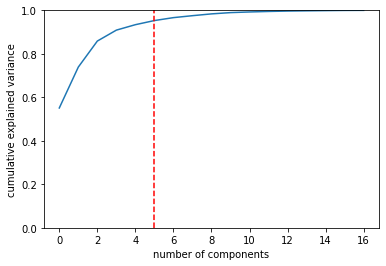

In [10]:
plot_cumulative_explained_variance(pca.explained_variance_ratio_)

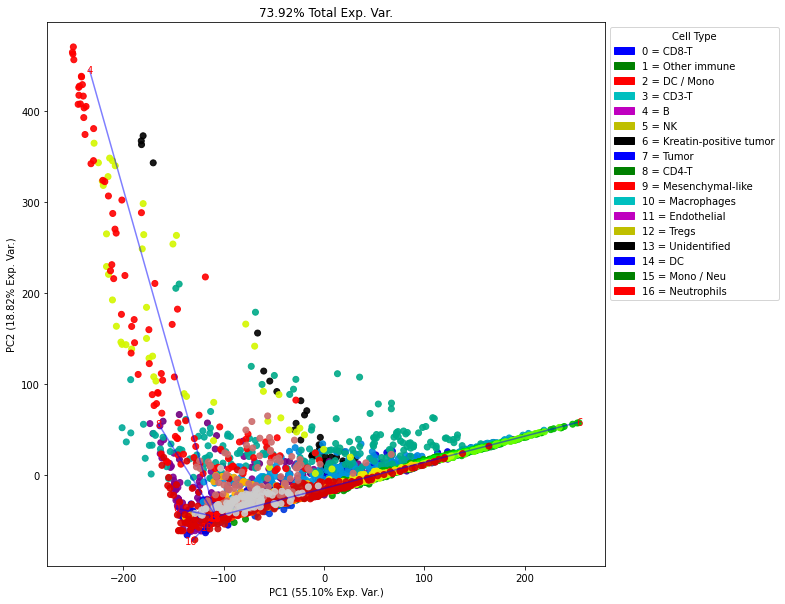

In [11]:
original_axis = np.zeros((18, 17))
np.fill_diagonal(original_axis, np.array(sites).max(0))
original_axis_pc = pca.transform(original_axis)
plot_scatter_pca(pc, pca.explained_variance_ratio_, labels=patient_ids, original_axis=original_axis_pc, cell_type=CELL_TYPES)

0.86% Total Exp. Var.


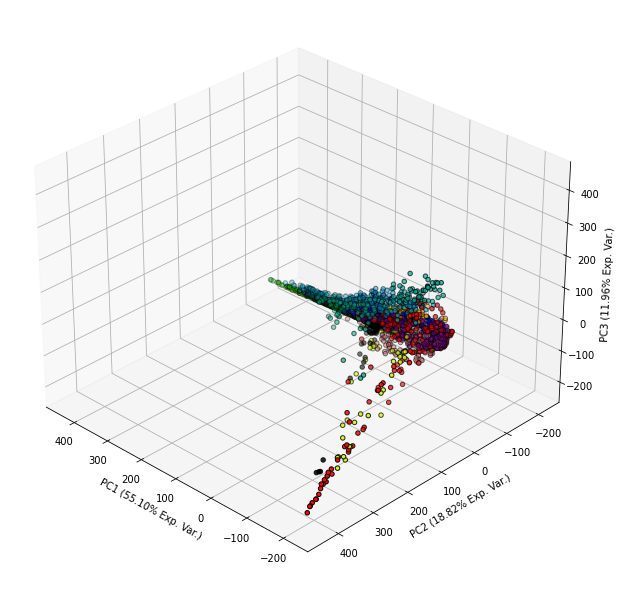

In [12]:
plot_3Dscatter_pca(pc, pca.explained_variance_ratio_, patient_ids)